In [1]:
import matplotlib.pyplot as plt 
from matplotlib.ticker import FormatStrFormatter as fsf 
from ultra.visuals import make_matplotlib_pretty_again 
import ultra.visuals as v 
import numpy as np 
import math as m 
import vice 
import sys 
import os 

/anaconda3/lib/python3.7/site-packages/vice/__init__.py:99: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [19]:
def run_model(fe_yield, delay): 
    vice.yields.ccsne.settings["fe"] = fe_yield
    sz = vice.singlezone() 
    sz.name = "WAF17Fig15_delay_%.2f_yfe_%.2e" % (delay, fe_yield) 
    sz.mode = "sfr" 
    sz.func = lambda t: 3. * m.exp(-t / 2) 
    sz.delay = delay 
#     sz.dt = 0.002
    sz.dt = 0.0002
    sz.eta = 1.5 
    sz.run(np.linspace(0, 2, 2001), overwrite = True)  

In [2]:
# from vice.yields.presets import my_yields 
run_model(0.0002, 0.15) 
run_model(0.0002, 0.05)  
run_model(0.0012, 0.15) 
run_model(0.0012, 0.05)  

NameError: name 'run_model' is not defined

In [2]:
def setup_subplot(): 
    fig = plt.figure(figsize = (7, 4)) 
    ax = fig.add_subplot(111, facecolor = "white") 
    ax.set_xlabel("Time [Myr]") 
    ax.set_ylabel(r"$\langle$[Fe/H]$\rangle$") 
    ax.set_xscale("log") 
    ax.xaxis.set_major_formatter(fsf("%g")) 
    return ax

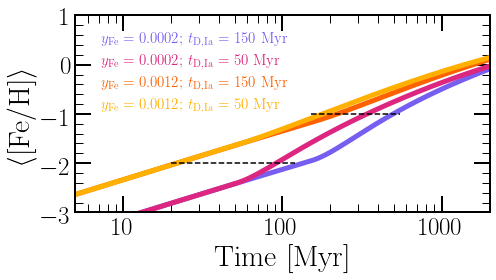

In [3]:
ax = setup_subplot() 
yields = [0.0002, 0.0002, 0.0012, 0.0012] 
delays = [0.15, 0.05, 0.15, 0.05] 
# colors = ["black", "crimson", "lime", "blue"] 
# colors = ["#ED3816", "#CC3259", "#ED5410", "#5DBD3E"] 
colors = ["#785EF0", "#DC267F", "#FE6100", "#FFB000"] 
for i in range(len(yields)): 
    hist = vice.history("WAF17Fig15_delay_%.2f_yfe_%.2e" % (delays[i], yields[i]))  
    ax.plot([1000 * i for i in hist["time"]], hist["[Fe/H]"], c = colors[i], 
        linewidth = 5) 
lines = len(yields)* [None] 
for i in range(len(yields)): 
    lines[i] = ax.plot([1, 2], [-0.2, -0.1], c = v.colors()["white"], 
#     lines[i] = ax.plot([1, 2], [-0.2, -0.1], color = colors[i], 
        label = r"$y_\text{Fe} = %g$; $t_\text{D,Ia} = %g$ Myr" % (yields[i], 1000 * delays[i]))[0] 
leg = ax.legend(loc = v.mpl_loc("upper left"), ncol = 1, frameon = False, 
        bbox_to_anchor = (0.0, 0.98), handlelength = 0, fontsize = 15) 
for i in range(len(lines)): 
    lines[i].remove() 
    leg.get_texts()[i].set_color(colors[i]) 
# ax.plot([0.1, 10000], [-2, -2], c = v.colors()["black"], linestyle = ':') 
ax.plot([20, 120], [-2, -2], c = v.colors()["black"], linestyle = '--') 
ax.plot([150, 550], [-1, -1], c = v.colors()["black"], linestyle = '--')
ax.set_xlim([5, 2000]) 
ax.set_ylim([-3, 1]) 
ax.yaxis.set_ticks([-3, -2, -1, 0, 1]) 
plt.tight_layout() 
plt.savefig("WAF17Fig15a.pdf") 
plt.show() 